In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [1]:
# Cell 1: imports and list files
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

print("Files under /kaggle/input/lead-scoring-dataset:")
for p in Path('/kaggle/input/lead-scoring-dataset').rglob('*'):
    print(p)


Files under /kaggle/input/lead-scoring-dataset:
/kaggle/input/lead-scoring-dataset/Lead Scoring.csv
/kaggle/input/lead-scoring-dataset/Leads Data Dictionary.xlsx


In [4]:
# Cell 2: load data; dataset has a CSV - try to auto-detect
data_dir = Path('/kaggle/input/lead-scoring-dataset')
csv_files = list(data_dir.glob('*.csv'))
if not csv_files:
    # sometimes CSV is inside folder
    csv_files = list(data_dir.rglob('*.csv'))
print("CSV files found:", csv_files)

# Use the first csv found (adjust if needed)
data_path = str(csv_files[0])
df = pd.read_csv(data_path)
print("Loaded:", data_path)
print("Shape:", df.shape)
display(df.head())

# load data dictionary if exists
ddx = None
xlsx_files = list(data_dir.glob('*.xlsx')) + list(data_dir.rglob('*.xlsx'))
if xlsx_files:
    try:
        ddx = pd.read_excel(xlsx_files[0])
        print("Loaded data dictionary:", xlsx_files[0])
        display(ddx.head())
    except Exception as e:
        print("Could not read data dictionary:", e)


CSV files found: [PosixPath('/kaggle/input/lead-scoring-dataset/Lead Scoring.csv')]
Loaded: /kaggle/input/lead-scoring-dataset/Lead Scoring.csv
Shape: (9240, 37)


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Loaded data dictionary: /kaggle/input/lead-scoring-dataset/Leads Data Dictionary.xlsx


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Variables,Description
2,NaN,Prospect ID,A unique ID with which the customer is identif...
3,NaN,Lead Number,A lead number assigned to each lead procured.
4,NaN,Lead Origin,The origin identifier with which the customer ...


In [5]:
# Cell 3: EDA overview
pd.set_option('display.max_columns', 200)
print("Columns and dtypes:")
display(df.dtypes)
print("\nNull counts (top 30):")
display(df.isna().sum().sort_values(ascending=False).head(30))
print("\nSample unique value counts (for object cols):")
for c in df.select_dtypes(include='object').columns:
    print(c, "->", df[c].nunique())
    display(df[c].dropna().unique()[:10])


Columns and dtypes:


Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       


Null counts (top 30):


Lead Quality                                     4767
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Lead Origin                 


Sample unique value counts (for object cols):
Prospect ID -> 9240


array(['7927b2df-8bba-4d29-b9a2-b6e0beafe620',
       '2a272436-5132-4136-86fa-dcc88c88f482',
       '8cc8c611-a219-4f35-ad23-fdfd2656bd8a',
       '0cc2df48-7cf4-4e39-9de9-19797f9b38cc',
       '3256f628-e534-4826-9d63-4a8b88782852',
       '2058ef08-2858-443e-a01f-a9237db2f5ce',
       '9fae7df4-169d-489b-afe4-0f3d752542ed',
       '20ef72a2-fb3b-45e0-924e-551c5fa59095',
       'cfa0128c-a0da-4656-9d47-0aa4e67bf690',
       'af465dfc-7204-4130-9e05-33231863c4b5'], dtype=object)

Lead Origin -> 5


array(['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import',
       'Quick Add Form'], dtype=object)

Lead Source -> 21


array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Welingak Website', 'Reference', 'google',
       'Facebook', 'blog'], dtype=object)

Do Not Email -> 2


array(['No', 'Yes'], dtype=object)

Do Not Call -> 2


array(['No', 'Yes'], dtype=object)

Last Activity -> 17


array(['Page Visited on Website', 'Email Opened', 'Unreachable',
       'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation'], dtype=object)

Country -> 38


array(['India', 'Russia', 'Kuwait', 'Oman', 'United Arab Emirates',
       'United States', 'Australia', 'United Kingdom', 'Bahrain', 'Ghana'],
      dtype=object)

Specialization -> 19


array(['Select', 'Business Administration', 'Media and Advertising',
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance'], dtype=object)

How did you hear about X Education -> 10


array(['Select', 'Word Of Mouth', 'Other', 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

What is your current occupation -> 6


array(['Unemployed', 'Student', 'Working Professional', 'Businessman',
       'Other', 'Housewife'], dtype=object)

What matters most to you in choosing a course -> 3


array(['Better Career Prospects', 'Flexibility & Convenience', 'Other'],
      dtype=object)

Search -> 2


array(['No', 'Yes'], dtype=object)

Magazine -> 1


array(['No'], dtype=object)

Newspaper Article -> 2


array(['No', 'Yes'], dtype=object)

X Education Forums -> 2


array(['No', 'Yes'], dtype=object)

Newspaper -> 2


array(['No', 'Yes'], dtype=object)

Digital Advertisement -> 2


array(['No', 'Yes'], dtype=object)

Through Recommendations -> 2


array(['No', 'Yes'], dtype=object)

Receive More Updates About Our Courses -> 1


array(['No'], dtype=object)

Tags -> 26


array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)'], dtype=object)

Lead Quality -> 5


array(['Low in Relevance', 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

Update me on Supply Chain Content -> 1


array(['No'], dtype=object)

Get updates on DM Content -> 1


array(['No'], dtype=object)

Lead Profile -> 6


array(['Select', 'Potential Lead', 'Other Leads', 'Lateral Student',
       'Dual Specialization Student', 'Student of SomeSchool'],
      dtype=object)

City -> 7


array(['Select', 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

Asymmetrique Activity Index -> 3


array(['02.Medium', '01.High', '03.Low'], dtype=object)

Asymmetrique Profile Index -> 3


array(['02.Medium', '01.High', '03.Low'], dtype=object)

I agree to pay the amount through cheque -> 1


array(['No'], dtype=object)

A free copy of Mastering The Interview -> 2


array(['No', 'Yes'], dtype=object)

Last Notable Activity -> 16


array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent'], dtype=object)

In [6]:
# Cell 4: detect a plausible target column
possible_targets = ['Converted', 'converted', 'is_converted', 'Converted?','Converted_flag','Converted_Yes','Converted (0/1)','Converted (True/False)']
found_targets = [c for c in df.columns if c in possible_targets]
if not found_targets:
    # use heuristic: column with name containing 'convert' or 'converted' or values 0/1
    found_targets = [c for c in df.columns if 'convert' in c.lower() or 'converted' in c.lower()]
    
# if still not found, look for binary-like columns
if not found_targets:
    for c in df.columns:
        uniques = df[c].dropna().unique()
        if set(uniques).issubset({0,1}) or len(uniques)<=3:
            found_targets.append(c)
            break

print("Detected target candidates:", found_targets)
if not found_targets:
    raise ValueError("No obvious target column found. Inspect column names and set target_col manually.")
target_col = found_targets[0]
print("Using target column:", target_col)
display(df[target_col].value_counts(dropna=False))


Detected target candidates: ['Converted']
Using target column: Converted


Converted
0    5679
1    3561
Name: count, dtype: int64

In [7]:
# Cell 5: cleaning
df_clean = df.copy()

# Drop obviously useless columns (IDs, urls) heuristically
drop_candidates = [c for c in df_clean.columns if c.lower().strip() in ('lead_id','id','id_','leadid','lead id','slno')]
drop_candidates += [c for c in df_clean.columns if 'url' in c.lower() or 'link' in c.lower()]
drop_candidates = list(set(drop_candidates))
print("Dropping columns (if present):", drop_candidates)
df_clean = df_clean.drop(columns=[c for c in drop_candidates if c in df_clean.columns])

# Fill numeric NaNs with median, categorical with 'unknown'
num_cols = df_clean.select_dtypes(include=['number']).columns.tolist()
cat_cols = df_clean.select_dtypes(include=['object','category']).columns.tolist()
# ensure target is not in feature lists
if target_col in num_cols: 
    num_cols.remove(target_col)
if target_col in cat_cols:
    cat_cols.remove(target_col)

for c in num_cols:
    df_clean[c] = df_clean[c].fillna(df_clean[c].median())

for c in cat_cols:
    df_clean[c] = df_clean[c].fillna('unknown')

print("After imputation shape:", df_clean.shape)


Dropping columns (if present): []
After imputation shape: (9240, 37)


In [8]:
# Cell 6: feature engineering
from sklearn.preprocessing import LabelEncoder

df_feat = df_clean.copy()

# Convert boolean-like text to 0/1 if present
bool_map = {'yes':1,'no':0,'y':1,'n':0,'true':1,'false':0, 'Yes':1, 'No':0}
for c in df_feat.select_dtypes(include='object').columns:
    sample = df_feat[c].dropna().astype(str).str.lower().unique()[:10]
    if set(sample).issubset(set(k.lower() for k in bool_map.keys())):
        df_feat[c] = df_feat[c].map(lambda x: bool_map.get(str(x).lower(), np.nan)).fillna(0).astype(int)

# Recompute categorical columns after boolean mapping
cat_cols = df_feat.select_dtypes(include='object').columns.tolist()

# Decide low vs high cardinality
low_card = [c for c in cat_cols if df_feat[c].nunique() <= 15]
high_card = [c for c in cat_cols if c not in low_card]

print("Low-card categorical cols (one-hot):", low_card)
print("High-card categorical cols (freq-encode):", high_card)

# One-hot encode low-cardinality
df_feat = pd.get_dummies(df_feat, columns=low_card, drop_first=True)

# Frequency encode high-cardinality
for c in high_card:
    freq = df_feat[c].value_counts(normalize=True)
    df_feat[c + '_freq'] = df_feat[c].map(freq)
    df_feat.drop(columns=[c], inplace=True)

# Ensure no string columns remain (except target)
remaining_object_cols = df_feat.select_dtypes(include='object').columns.tolist()
print("Remaining object columns (should be empty):", remaining_object_cols)

# Final feature list
feature_cols = [c for c in df_feat.columns if c != target_col]
print("Final feature count:", len(feature_cols))


Low-card categorical cols (one-hot): ['Lead Origin', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']
High-card categorical cols (freq-encode): ['Prospect ID', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'Tags', 'Last Notable Activity']
Remaining object columns (should be empty): []
Final feature count: 74


In [9]:
# Cell 7: split and scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_feat[feature_cols].copy()
y = df_feat[target_col].astype(int)

# stratify if possible
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=test_size, random_state=42)

numeric_cols_after = X_train.select_dtypes(include='number').columns.tolist()
# Optionally avoid scaling one-hot columns; but StandardScaler on all numeric cols is fine
scaler = StandardScaler()
X_train[numeric_cols_after] = scaler.fit_transform(X_train[numeric_cols_after])
X_test[numeric_cols_after] = scaler.transform(X_test[numeric_cols_after])

print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)


X_train shape: (7392, 74) X_test shape: (1848, 74)


In [10]:
# Cell 8: model training & evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_recall_curve

# Logistic Regression
lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train, y_train)
probs_lr = lr.predict_proba(X_test)[:,1]
auc_lr = roc_auc_score(y_test, probs_lr)
print("Logistic Regression ROC-AUC:", round(auc_lr,4))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
probs_rf = rf.predict_proba(X_test)[:,1]
auc_rf = roc_auc_score(y_test, probs_rf)
print("Random Forest ROC-AUC:", round(auc_rf,4))

# Choose best
best_model = rf if auc_rf >= auc_lr else lr
print("Selected best model:", type(best_model).__name__)


Logistic Regression ROC-AUC: 0.9143
Random Forest ROC-AUC: 0.9744
Selected best model: RandomForestClassifier


In [17]:
# ==========================================
# FINAL CELL — Build and Save Pipeline (fixed for sklearn ≥1.6)
# ==========================================
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import joblib, os

# 1️⃣ Define numeric and categorical columns
numeric_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object','category']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# 2️⃣ Build preprocessing transformer (use sparse_output instead of sparse)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols)
    ],
    remainder="drop"
)

# 3️⃣ Build full pipeline (preprocessing + trained model)
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", best_model)   # use your trained best_model (RF, LR, etc.)
])

# 4️⃣ Fit pipeline on full dataset
pipe.fit(X, y)

# 5️⃣ Save compressed pipeline to /kaggle/working/models
os.makedirs('/kaggle/working/models', exist_ok=True)
joblib.dump(pipe, '/kaggle/working/models/lead_pipeline_compressed.joblib', compress=3)

print("✅ Pipeline saved to /kaggle/working/models/lead_pipeline_compressed.joblib")


Numeric columns: ['Lead Number', 'Do Not Email', 'Do Not Call', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Prospect ID_freq', 'Lead Source_freq', 'Last Activity_freq', 'Country_freq', 'Specialization_freq', 'Tags_freq', 'Last Notable Activity_freq']
Categorical columns: []
✅ Pipeline saved to /kaggle/working/models/lead_pipeline_compressed.joblib


In [11]:
# Cell 9: evaluation & threshold suggestions
from sklearn.metrics import roc_curve, auc, precision_recall_curve

probs = best_model.predict_proba(X_test)[:,1]
fpr, tpr, roc_thresh = roc_curve(y_test, probs)
pr_prec, pr_rec, pr_thresh = precision_recall_curve(y_test, probs)

print("Test ROC-AUC:", roc_auc_score(y_test, probs))
# choose threshold for high precision or recall; show a few threshold trade-offs
df_thresh = pd.DataFrame({
    'threshold': pr_thresh,
    'precision': pr_prec[:-1],
    'recall': pr_rec[:-1]
})
display(df_thresh.sort_values('precision', ascending=False).head(10))

# Confusion at default 0.5
pred_default = (probs >= 0.5).astype(int)
print("Classification report at 0.5:")
print(classification_report(y_test, pred_default))


Test ROC-AUC: 0.9744118679775281


,threshold,precision,recall
193,0.990,1.000000,0.200843
194,0.995,1.000000,0.144663
195,1.000,1.000000,0.102528
188,0.965,0.996016,0.351124
189,0.970,0.995726,0.327247
190,0.975,0.995413,0.304775
191,0.980,0.994924,0.275281
192,0.985,0.994286,0.244382
187,0.960,0.992537,0.373596
164,0.845,0.987152,0.647472


Classification report at 0.5:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1136
           1       0.92      0.89      0.90       712

    accuracy                           0.93      1848
   macro avg       0.92      0.92      0.92      1848
weighted avg       0.93      0.93      0.93      1848



Tags_freq                                                0.196303
Total Time Spent on Website                              0.121247
Lead Number                                              0.066141
Last Notable Activity_freq                               0.048149
Last Activity_freq                                       0.043837
Lead Profile_Potential Lead                              0.042304
Asymmetrique Activity Score                              0.032992
Lead Origin_Lead Add Form                                0.032094
Lead Quality_unknown                                     0.029353
Lead Source_freq                                         0.028379
Lead Quality_Might be                                    0.028194
TotalVisits                                              0.024484
Page Views Per Visit                                     0.023911
Lead Profile_unknown                                     0.023238
What matters most to you in choosing a course_unknown    0.022652
Specializa

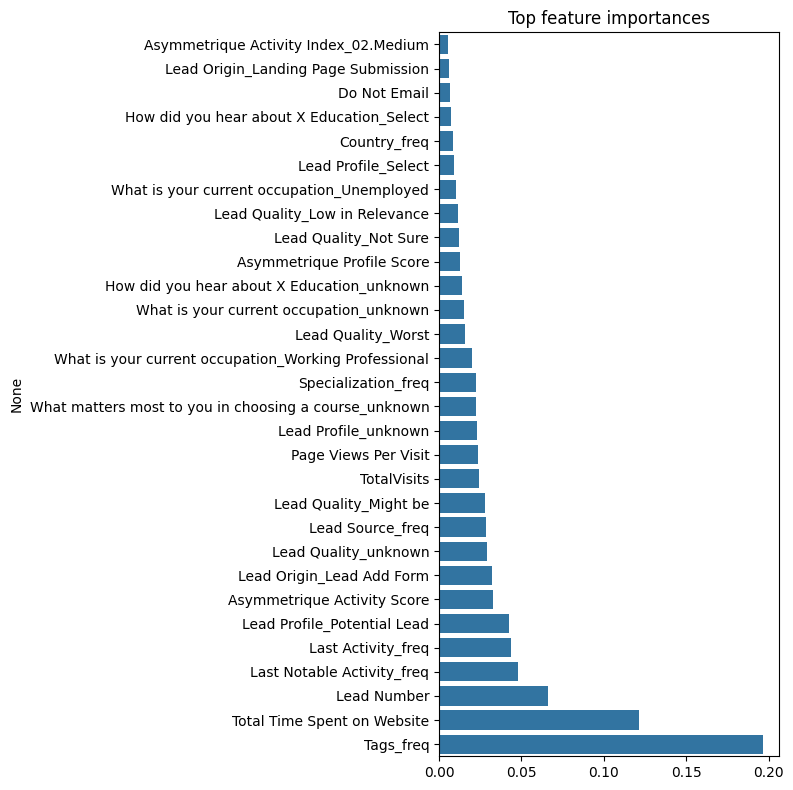

In [12]:
# Cell 10: feature importance (for tree models)
if hasattr(best_model, 'feature_importances_'):
    importances = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(30)
    plt.figure(figsize=(8,8))
    sns.barplot(x=importances.values[::-1], y=importances.index[::-1])
    plt.title("Top feature importances")
    plt.tight_layout()
    display(importances)
else:
    print("Best model does not expose feature_importances_. Try coef_ for linear models.")
    if hasattr(best_model, 'coef_'):
        coefs = pd.Series(best_model.coef_[0], index=X_train.columns).sort_values(key=abs, ascending=False).head(30)
        display(coefs)


In [13]:
# Cell 11: score full dataset and save artifacts
import joblib
out_df = df.copy()  # original raw dataframe to attach scores

# Recreate preprocessing pipeline on raw df (simple approach: re-run same ops on df_clean -> df_feat)
# We'll use df_feat that we prepared earlier (it corresponds to df_clean)
X_all = df_feat[feature_cols].copy()
# scale numeric cols
X_all[numeric_cols_after] = scaler.transform(X_all[numeric_cols_after])

scores_all = best_model.predict_proba(X_all)[:,1]
out_df['lead_score'] = scores_all
out_df['lead_rank'] = out_df['lead_score'].rank(ascending=False, method='first')
out_df_sorted = out_df.sort_values('lead_score', ascending=False)

# Save to /kaggle/working
out_df_sorted.to_csv('/kaggle/working/scored_leads_full.csv', index=False)
out_df_sorted.head(200).to_csv('/kaggle/working/scored_leads_top200.csv', index=False)
os.makedirs('/kaggle/working/models', exist_ok=True)
# Compress model and scaler to reduce file size
joblib.dump(best_model, '/kaggle/working/models/lead_model_compressed.joblib', compress=3)
joblib.dump(scaler, '/kaggle/working/models/scaler_compressed.joblib', compress=3)

print("Compressed model files saved!")

print("Saved outputs to /kaggle/working/:", os.listdir('/kaggle/working')[:20])


Compressed model files saved!
Saved outputs to /kaggle/working/: ['models', 'scored_leads_top200.csv', '.virtual_documents', 'scored_leads_full.csv']


,lead_score,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email
6154,1.0,b3af7901-09d8-49b7-803f-1cd1e1e8878a,602566,Lead Add Form,Reference,No
9219,1.0,9c970d5c-2748-4f61-90a6-eafd9ad5a242,579778,Landing Page Submission,Direct Traffic,No
5251,1.0,a35b3a91-4c58-40a8-9628-1aabefa2a437,609489,Landing Page Submission,Google,No
5167,1.0,d8f91286-32ea-469b-819f-36f498c4cfad,610330,API,Organic Search,No
5173,1.0,909a260f-f5fe-4c8a-82bf-997700a58fa2,610273,Landing Page Submission,Google,No
6729,1.0,8fecb1f3-e4b8-4ce2-9439-114dfdf87759,598199,Lead Add Form,Welingak Website,No
1043,1.0,e649f965-2244-4973-8d3f-7d07b4d38483,649080,API,Olark Chat,No
6737,1.0,acb7662d-d063-4104-a60e-c9eadb695535,598127,Lead Add Form,Reference,No
1050,1.0,7ef6843d-ae2e-416e-878b-95d4cae0c25d,649003,Landing Page Submission,Google,No
1051,1.0,a71729bb-0250-4fa4-af36-182a23a699b2,648999,API,Google,No


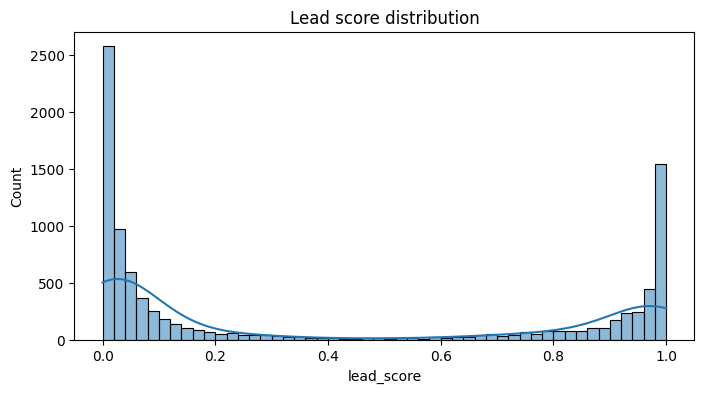

In [14]:
# Cell 12: top leads and score distribution
display(out_df_sorted.head(20)[['lead_score'] + [c for c in out_df_sorted.columns if c not in ['lead_score','lead_rank']][:5]])
plt.figure(figsize=(8,4))
sns.histplot(out_df_sorted['lead_score'], bins=50, kde=True)
plt.title("Lead score distribution")
plt.show()
